In [1]:
#load libraries
import lib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC

In [2]:
def plotting_funciton(svm,X,y):
    C = 1.0  # SVM regularization parameter
    # models = (svm.SVC(kernel='linear', C=C),
    #           svm.LinearSVC(C=C, max_iter=10000),
    #           svm.SVC(kernel='rbf', gamma=0.7, C=C),
    #           svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
    # models = (clf.fit(X, y) for clf in models)

    # title for the plots
    # title = 'SVC with linear kernel'

    # # Set-up 2x2 grid for plotting.
    fig, sub = plt.subplots(1,1)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    ax = sub

    X0, X1 = X[:,0], X[:,1]
    xx, yy = lib.make_meshgrid(X0, X1)

    # # ###########################################################################
    w = svm.coef_[0]
    a = -w[0] / w[1]
    XX = np.linspace(-5, 5)
    YY = a * XX - (svm.intercept_[0]) / w[1]
    ax.plot(XX, YY, "-")
    # # ###########################################################################

    # for clf, title, ax in zip(models, titles, sub.flatten()):
    lib.plot_contours(ax, svm, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('0')
    ax.set_ylabel('1')
    ax.set_xticks(())
    ax.set_yticks(())
    # ax.set_title(title)

    plt.show()

In [3]:
#load dataset
X,y = lib.generate_circle(samples=500)

In [4]:
def devision(X,y,svm):
    w = svm.coef_[0]
    a = -w[0] / w[1]
    Xsvm = a * X[:,0] - (svm.intercept_[0]) / w[1]
    div = np.copy(y)
    div.fill(0)
    div[X[:,1]>Xsvm] = 1
    div = np.reshape(div,(-1,1))
    return div

In [32]:
#caluculate nearest neighbors
def find_nn(X,y,n_neighbors=50,n_most_different=50):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(X)
    distances, indices = nbrs.kneighbors(X)
    ys = y[indices]
    Xs = X[indices]
    most_different_nn = np.argsort(-np.var(ys,1))[:n_most_different]
    most_different_var = -np.sort(-np.var(ys,1))[:n_most_different]
    return Xs[most_different_nn],ys[most_different_nn],most_different_var

def find_proper_svm(X,y):
    Xs,ys,var = find_nn(X,y)
    combined_score = []
    clf = LinearSVC(random_state=0, tol=1e-5)
    for i in range(len(ys)):
        clf.fit(Xs[i], ys[i])
#         print(f'{clf.score(Xs[i],ys[i])} {clf.score(X,y)}')
#         plotting_funciton(clf,X,y)
        combined_score.append(clf.score(Xs[i], ys[i])*var[i])
    am = np.argmax(combined_score)
    return clf.fit(Xs[am], ys[am])

In [25]:
def smallify_dataset(X,y,div):
    y_left = y[div==0]
    X_left = X[div==0]
    y_right = y[div==1]
    X_right = X[div==1]
    return X_left, y_left,  X_right,  y_right

In [26]:
cs = find_proper_svm(X,y)
cs

LinearSVC(random_state=0, tol=1e-05)

In [31]:
    w = svm.coef_[0]
    ww = svm.intercept_[0]
    w

array([-0.11980964, -0.17457804])

In [9]:
div = devision(X,y,cs)

In [10]:
#get dataset

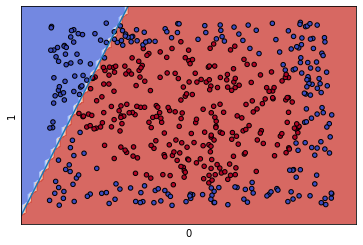

In [11]:
plotting_funciton(cs,X,y)

In [12]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

svm = LinearSVC(random_state=0, tol=1e-5)
svm.fit(X, y)

LinearSVC(random_state=0, tol=1e-05)

In [13]:
len(y)

500

In [14]:
div = np.zeros((2**5,len(y)))
div[1,:] = devision(X,y,svm)

ValueError: could not broadcast input array from shape (500,1) into shape (500)

In [ ]:
plotting_funciton(clf,X,y)

In [19]:
class svm_tree:
    def __init__(self,X,y,n_levels):
        self.X = X
        self.y = y
        self.n_levels = n_levels
        self.svm_list = []
        svm_list.append(find_proper_svm(X,y))
        
        #duplicate div
        self.div = np.zeros((2**n_levels,len(y)))
        self.div[1,:] = devision(X,y,svm_list[0])[:,0]
        #run each of the duplicates through svm 
        #append div
    #######################start loop here
    def node(Xn,yn,node_number,level):
        #find proper devision
        svm = find_proper_svm(Xn,yn)
        #define divider function
        self.div[node_number,:] = devision(self.X,self.y,svm)
        #calculate SVM over children
        X_left, y_left,  X_right,  y_right = smallify_dataset(Xm,ym,div)
        node(X_left, y_left,2*node_number,level+1)
        node(X_right,  y_right,2*node_number+1,level+1)


In [22]:
svm_list = []

#generate X,y
X,y = lib.generate_circle(samples=500)

#root node
st = svm_tree(X,y,5)
st.div[1,:]
#plot
# plotting_funciton(svm_right,X,y)

array([1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [ ]:
np.var(y_right)

In [ ]:
#def take_left(X,y,div):
X_left, y_left,  X_right,  y_right = smallify_dataset(X,y,div)
# svm_left = find_proper_svm(X_left, y_left)
svm_right = find_proper_svm(X_right,  y_right)

In [ ]:
#calculate accuracy of these points

In [ ]:
#split using point of highest accuracy

In [ ]:
div = np.reshape(div,(-1,1))
np.shape(div)
repdiv = np.repeat(div,2,axis=1)

In [ ]:
np.shape(repdiv)

In [ ]:
    def forward(self, x, save_flag = False):
        if self.prms.feature_map == True:
            if x.is_cuda and not self.feature_mask.is_cuda:
                self.feature_mask = self.feature_mask.cuda()
            feats = torch.mm(x.view(-1,self.feature_mask.size(0)), self.feature_mask)
        else:
            feats = x

        self.d = [self.decision(node(feats)) for node in self.fc]
        
        self.d = torch.stack(self.d)

        decision = torch.cat((self.d,1-self.d),dim=2).permute(1,0,2)
        
        batch_size = x.size()[0]
        mu = x.data.new(x.size(0),1,1).fill_(1.)
        big_mu = x.data.new(x.size(0),2,1).fill_(1.)
        begin_idx = 1
        end_idx = 2
        for n_layer in range(0, self.depth):
            # mu stores the probability a sample is routed at certain node
            # repeat it to be multiplied for left and right routing
            mu = mu.repeat(1, 1, 2)
            # the routing probability at n_layer
            _decision = decision[:, begin_idx:end_idx, :] # -> [batch_size,2**n_layer,2]
            mu = mu*_decision # -> [batch_size,2**n_layer,2]
            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (n_layer+1)
            # merge left and right nodes to the same layer
            mu = mu.view(x.size(0), -1, 1)
            big_mu = torch.cat((big_mu,mu),1)

        big_mu = big_mu.view(x.size(0), -1)    
        # self.mu_cache.append(big_mu)  
        return big_mu #-> [batch size,n_leaf]